# Series

The `pandas` library contains these useful data structures:
* `Series` objects, that we will discuss now. A `Series` object is 1D array, similar to a column in a spreadsheet (with a column name and row labels).
* `DataFrame` objects. This is a 2D table, similar to a spreadsheet (with column names and row labels).
* `Panel` objects. You can see a `Panel` as a dictionary of `DataFrame`s. These are less used, so we will not discuss them here.

A Series is very similar to a NumPy array (in fact it is built on top of the NumPy array object). What differentiates the NumPy array from a Series, is that a Series can have axis labels, meaning it can be indexed by a label, instead of just a number location. It also doesn't need to hold numeric data, it can hold any arbitrary Python Object.

In [14]:
import numpy as np
import pandas as pd

### Creating a Series

You can convert a list,numpy array, or dictionary to a Series:

In [15]:
labels = ['a','b','c']
my_list = [10,20,30]
arr = np.array([10,20,30])

**Using Lists**

In [16]:
pd.Series(data=my_list)

0    10
1    20
2    30
dtype: int64

In [17]:
pd.Series(data=my_list,index=labels)

a    10
b    20
c    30
dtype: int64

In [18]:
pd.Series(my_list,labels)

a    10
b    20
c    30
dtype: int64

### Data in a Series

A pandas Series can hold a variety of object types:

In [19]:
pd.Series(data=labels)

0    a
1    b
2    c
dtype: object

In [20]:
# Even functions (although unlikely that you will use this)
pd.Series([sum,print,len])

0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

### Similar to a 1D `ndarray`
`Series` objects behave much like one-dimensional NumPy `ndarray`s, and you can often pass them as parameters to NumPy functions:

In [21]:
import numpy as np
s = pd.Series([2,-1,3,5])
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

Arithmetic operations on `Series` are also possible, and they apply *elementwise*, just like for `ndarray`s:

In [22]:
s + [1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

Similar to NumPy, if you add a single number to a `Series`, that number is added to all items in the `Series` (**broadcasting**):

In [23]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

The same is true for all binary operations such as `*` or `/`, and even conditional operations:

In [24]:
type(s < 0)

pandas.core.series.Series

## Using an Index

The key to using a Series is understanding its index. Pandas makes use of these index names or numbers by allowing for fast look ups of information (works like a hash table or dictionary).

Each item in a `Series` object has a unique identifier called the *index label*. By default, it is simply the rank of the item in the `Series` (starting at `0`) but you can also set the index labels manually:

In [14]:
ser1 = pd.Series([1,2,3,4],index = ['USA', 'Germany','USSR', 'Japan'])                                   

In [15]:
ser1

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

In [16]:
ser2 = pd.Series([1,2,5,4],index = ['USA', 'Germany','Italy', 'Japan'])                                   

In [17]:
ser2

USA        1
Germany    2
Italy      5
Japan      4
dtype: int64

You can then use the `Series` just like a `dict`:

In [18]:
ser1['USA']

1

In [19]:
ser1.iloc[2]

3

You can still access the items by integer location, like in a regular array:

To make it clear when you are accessing by label or by integer location, it is recommended to always use the `loc` attribute when accessing by label, and the `iloc` attribute when accessing by integer location:

In [20]:
ser1.loc["USA"]

1

In [21]:
ser1.iloc[1]

2

Slicing a `Series` also slices the index labels:

In [22]:
ser1.iloc[1:3]

Germany    2
USSR       3
dtype: int64

This can lead to unexpected results when using the default numeric labels, so be careful:

In [26]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [27]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

The first element has index label `2`. The element with index label `0` is absent from the slice:

In [28]:
surprise_slice[:] = 1
surprise_slice

2    1
3    1
dtype: int64

In [29]:
surprise

0    1000
1    1001
2       1
3       1
dtype: int64

In [27]:
surprise_slice.iloc[0]

1

But remember that you can access elements by integer location using the `iloc` attribute. This illustrates another reason why it's always better to use `loc` and `iloc` to access `Series` objects:

In [28]:
surprise_slice.iloc[0]

1

## Init from `dict`
You can create a `Series` object from a `dict`. The keys will be used as index labels:

In [4]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

You can control which elements you want to include in the `Series` and in what order by explicitly specifying the desired `index`:

In [5]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

## Automatic alignment
When an operation involves multiple `Series` objects, `pandas` automatically aligns items by matching index labels.

In [31]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [32]:
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

In [8]:
print(s2.keys())
print(s3.keys())

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


In [10]:
print(s2.index)

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')


In [34]:
s2 + s3

alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

The resulting `Series` contains the union of index labels from `s2` and `s3`. Since `"colin"` is missing from `s2` and `"charles"` is missing from `s3`, these items have a `NaN` result value. (ie. Not-a-Number means *missing*).

Automatic alignment is very handy when working with data that may come from various sources with varying structure and missing items. But if you forget to set the right index labels, you can have surprising results:

In [33]:
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [34]:
s5 = pd.Series([1000,1000,1000,1000])
print("s2 =", s2.values)
print("s5 =", s5.values)
s5

s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]


0    1000
1    1000
2    1000
3    1000
dtype: int64

In [12]:
s2 + s5

alice     NaN
bob       NaN
charles   NaN
darwin    NaN
0         NaN
1         NaN
2         NaN
3         NaN
dtype: float64

Pandas could not align the `Series`, since their labels do not match at all, hence the full `NaN` result.

## Init with a scalar
You can also initialize a `Series` object using a scalar and a list of index labels: all items will be set to the scalar.

In [39]:
meaning = pd.Series(data=42, index=["life", "universe", "everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

## `Series` name
A `Series` can have a `name`:

In [35]:
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

In [41]:
s6.name

'weights'

# Handling time
Many datasets have timestamps, and pandas is awesome at manipulating such data:
* it can represent periods (such as 2016Q3) and frequencies (such as "monthly"),
* it can convert periods to actual timestamps, and *vice versa*,
* it can resample data and aggregate values any way you like,

## Time range
Let's start by creating a time series using `pd.date_range()`. This returns a `DatetimeIndex` containing one datetime per hour for 12 hours starting on October 29th 2016 at 5:30pm.

In [38]:
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

This `DatetimeIndex` may be used as an index in a `Series`:

In [40]:
temperatures = [4.4,5.1,6.1,6.2,6.2,5.7,5.2,4.7,4.1,3.9,3.5,9.0]
temp_series = pd.Series(temperatures, dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.2
2016-10-29 22:30:00    5.7
2016-10-29 23:30:00    5.2
2016-10-30 00:30:00    4.7
2016-10-30 01:30:00    4.1
2016-10-30 02:30:00    3.9
2016-10-30 03:30:00    3.5
2016-10-30 04:30:00    9.0
Freq: H, dtype: float64

Let's plot this series:

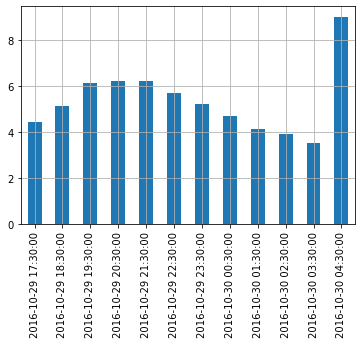

In [42]:
import matplotlib.pyplot as plt
temp_series.plot(kind="bar")
plt.grid(True)
plt.show()

## Resampling (downsampling)
Pandas lets us resample a time series very simply. Just call the `resample()` method and specify a new frequency:

In [43]:
temp_series_freq_2H = temp_series.resample("120min")
temp_series_freq_2H

In [44]:
temp_series_freq_2H.asfreq()

2016-10-29 16:00:00   NaN
2016-10-29 18:00:00   NaN
2016-10-29 20:00:00   NaN
2016-10-29 22:00:00   NaN
2016-10-30 00:00:00   NaN
2016-10-30 02:00:00   NaN
2016-10-30 04:00:00   NaN
Freq: 120T, dtype: float64

In [53]:
temp_series_freq_2H.indices  # the defaut value of the dict are list

defaultdict(list,
            {Timestamp('2016-10-29 16:00:00', freq='120T'): [0],
             Timestamp('2016-10-29 18:00:00', freq='120T'): [1, 2],
             Timestamp('2016-10-29 20:00:00', freq='120T'): [3, 4],
             Timestamp('2016-10-29 22:00:00', freq='120T'): [5, 6],
             Timestamp('2016-10-30 00:00:00', freq='120T'): [7, 8],
             Timestamp('2016-10-30 02:00:00', freq='120T'): [9, 10],
             Timestamp('2016-10-30 04:00:00', freq='120T'): [11]})

The resampling operation is actually a deferred operation, which is why we did not get a `Series` object, but a `DatetimeIndexResampler` object instead. To actually perform the resampling operation, we can simply call the `mean()` method: Pandas will compute the mean of every pair of consecutive hours:

In [45]:
temp_series_freq_2H = temp_series_freq_2H.mean() # we can also use sum or min or max ...

Let's plot the result:

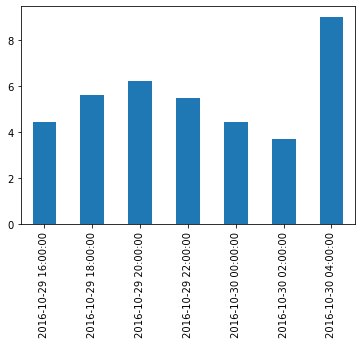

In [46]:
temp_series_freq_2H.plot(kind="bar")
plt.show()

Note how the values have automatically been aggregated into 2-hour periods. If we look at the 6-8pm period, for example, we had a value of `5.1` at 6:30pm, and `6.1` at 7:30pm. After resampling, we just have one value of `5.6`, which is the mean of `5.1` and `6.1`. Rather than computing the mean, we could have used any other aggregation function, for example we can decide to keep the minimum value of each period:

In [47]:
temp_series_freq_2H = temp_series.resample("2H").min()
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.2
2016-10-29 22:00:00    5.2
2016-10-30 00:00:00    4.1
2016-10-30 02:00:00    3.5
2016-10-30 04:00:00    9.0
Freq: 2H, dtype: float64

Or, equivalently, we could use the `apply()` method instead:

In [70]:
temp_series_freq_2H = temp_series.resample("2H").apply(np.min)
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

## Upsampling and interpolation
We can also upsample (ie. increase the frequency), but this creates holes in our data:

In [71]:
temp_series_freq_15min = temp_series.resample("15Min").mean()
temp_series_freq_15min.head(n=10) # `head` displays the top n values

2016-10-29 17:30:00    4.4
2016-10-29 17:45:00    NaN
2016-10-29 18:00:00    NaN
2016-10-29 18:15:00    NaN
2016-10-29 18:30:00    5.1
2016-10-29 18:45:00    NaN
2016-10-29 19:00:00    NaN
2016-10-29 19:15:00    NaN
2016-10-29 19:30:00    6.1
2016-10-29 19:45:00    NaN
Freq: 15T, dtype: float64

In [72]:
temp_series.resample("15Min")

One solution is to fill the gaps by interpolating. We just call the `interpolate()` method. The default is to use linear interpolation, but we can also select another method, such as cubic interpolation:

In [73]:
temp_series_freq_15min = temp_series.resample("15Min").interpolate(method="cubic")
temp_series_freq_15min.head(n=10)


2016-10-29 17:30:00    4.400000
2016-10-29 17:45:00    4.452911
2016-10-29 18:00:00    4.605113
2016-10-29 18:15:00    4.829758
2016-10-29 18:30:00    5.100000
2016-10-29 18:45:00    5.388992
2016-10-29 19:00:00    5.669887
2016-10-29 19:15:00    5.915839
2016-10-29 19:30:00    6.100000
2016-10-29 19:45:00    6.203621
Freq: 15T, dtype: float64

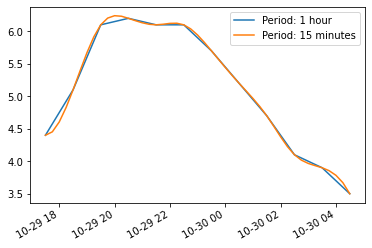

In [79]:
#temp_series_freq_2H.plot(label="Period: 2 hour")
temp_series.plot(label="Period: 1 hour")
temp_series_freq_15min.plot(label="Period: 15 minutes")

plt.legend(loc=1)
plt.show()